In [80]:
#import dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#Read in csv
loan_data = pd.read_csv("Resources/loan_approval_data.csv")

In [81]:
#Review the data
loan_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [82]:
loan_data.shape

(614, 13)

In [83]:
# Dropping Loan_ID column 
#As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.
loan_data.drop(['Loan_ID'],axis=1,inplace=True)

In [84]:
loan_data.shape

(614, 12)

In [85]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [86]:
loan_data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [87]:
#Addressing Missing Values 
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
# Drop rows with null values
loan_data.dropna(inplace=True)

# Check the shape of the DataFrame after dropping rows
print("Shape after dropping rows with null values:", loan_data.shape)

Shape after dropping rows with null values: (480, 12)


In [89]:
# Create a new column called 'combined_income' by adding 'ApplicantIncome' and 'CoapplicantIncome'
loan_data['combined_income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']

# Check the first few rows to verify
print(loan_data[['ApplicantIncome', 'CoapplicantIncome', 'combined_income']].head())


   ApplicantIncome  CoapplicantIncome  combined_income
1             4583             1508.0           6091.0
2             3000                0.0           3000.0
3             2583             2358.0           4941.0
4             6000                0.0           6000.0
5             5417             4196.0           9613.0


In [90]:
#Check cols
loan_data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  combined_income  
1         Rural           N           6091.0  
2         Urban           Y           3000.0  
3         Urban           Y           4941.0  
4         Urban           Y           6000.0  
5         Urban           Y           9613.0

In [91]:
loan_data['Coapplicant'] = loan_data['CoapplicantIncome'] != 0

#Check cols
loan_data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  combined_income  Coapplicant  
1         Rural           N           6091.0         True  
2         Urban           Y           3000.0        False  
3         Urban           Y           4941.0         True  
4         Urban           Y           6000.0        False  
5         Urban           Y           9613.0         True

In [92]:
#Remove those columns as they are no longer needed.
loan_data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

# Check the DataFrame after dropping columns
print(loan_data.head())

  Gender Married Dependents     Education Self_Employed  LoanAmount  \
1   Male     Yes          1      Graduate            No       128.0   
2   Male     Yes          0      Graduate           Yes        66.0   
3   Male     Yes          0  Not Graduate            No       120.0   
4   Male      No          0      Graduate            No       141.0   
5   Male     Yes          2      Graduate           Yes       267.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  \
1             360.0             1.0         Rural           N   
2             360.0             1.0         Urban           Y   
3             360.0             1.0         Urban           Y   
4             360.0             1.0         Urban           Y   
5             360.0             1.0         Urban           Y   

   combined_income  Coapplicant  
1           6091.0         True  
2           3000.0        False  
3           4941.0         True  
4           6000.0        False  
5           

In [93]:
# Plot your data to see what's in your DataFrame
loan_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

C:\Users\enc308\AppData\Local\Temp\ipykernel_12188\3395297291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
C:\Users\enc308\AppData\Local\Temp\ipykernel_12188\3395297291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
C:\Users\enc308\AppData\Local\Temp\ipykernel_12188\3395297291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
C:\Users\enc308\AppData\Local\Temp\ipykernel_12188\3395297291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
C:\Users\enc308\AppData\Local\Temp\ipykernel_12188\3395297291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y.index, rotation=90)
C:\Users\enc308\AppData\Local\Temp\ipykernel_12188\3395297291.py:

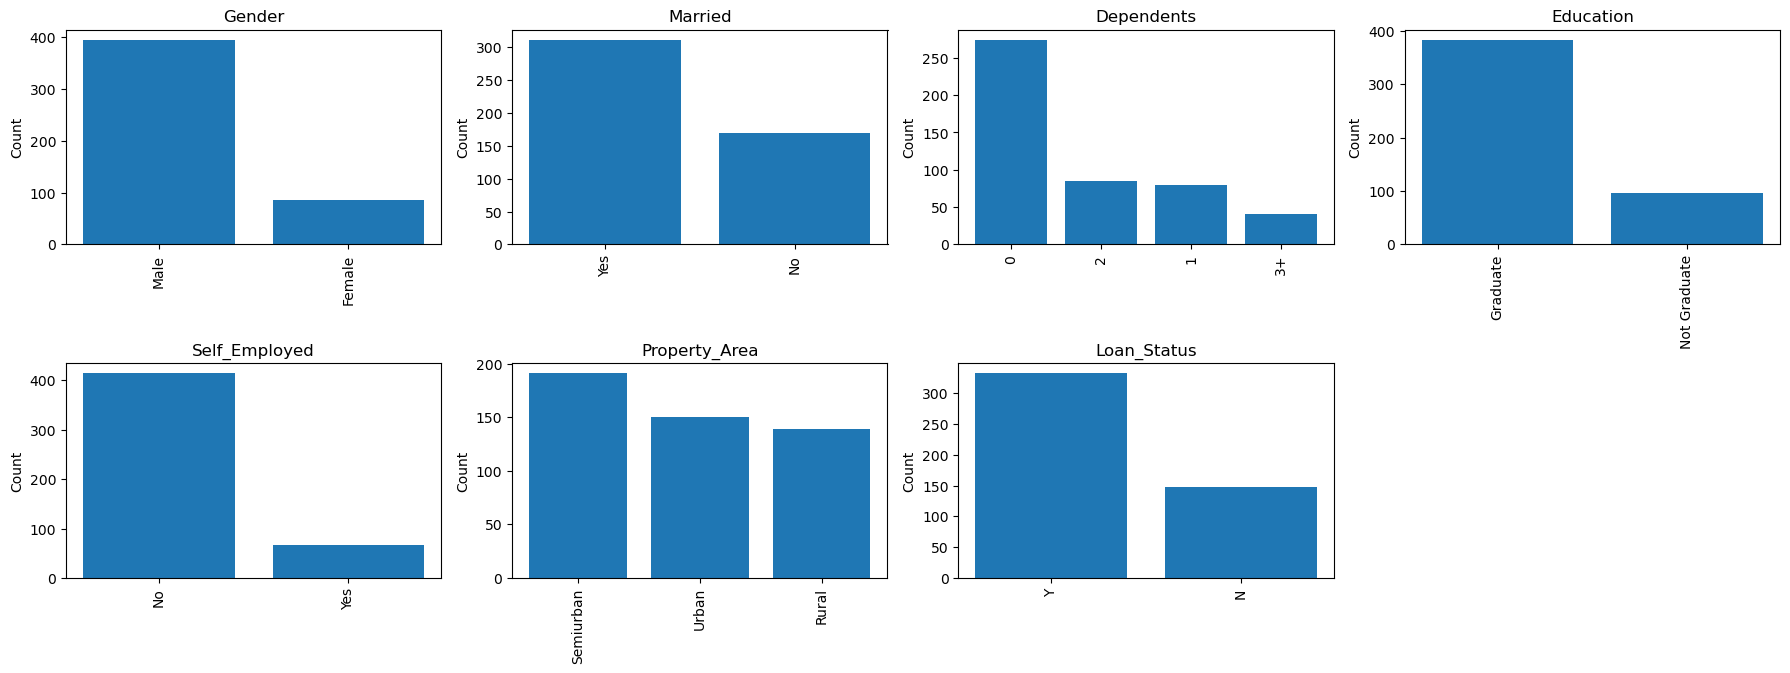

In [94]:
# Setting up the figure
obj = (loan_data.dtypes == 'object')
fig = plt.figure(figsize=(18, 36))
object_cols = list(obj[obj].index)

# Loop through each column
index = 1
for col in object_cols:
    # Get the value counts
    y = loan_data[col].value_counts()
    
    # Create subplot
    ax = fig.add_subplot(11, 4, index)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(y.index, rotation=90)
    
    # Create bar plot using matplotlib
    ax.bar(y.index, y)
    
    # Increment index
    index += 1
    
    # Add label to the subplot
    ax.set_title(col)
    
    # Add y-axis label
    ax.set_ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot

In [95]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column with categorical data
for col in loan_data.select_dtypes(include='object').columns:
    loan_data[col] = label_encoder.fit_transform(loan_data[col])

# Check the updated DataFrame
print(loan_data.head())

   Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
1       1        1           1          0              0       128.0   
2       1        1           0          0              1        66.0   
3       1        1           0          1              0       120.0   
4       1        0           0          0              0       141.0   
5       1        1           2          0              1       267.0   

   Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  \
1             360.0             1.0              0            0   
2             360.0             1.0              2            1   
3             360.0             1.0              2            1   
4             360.0             1.0              2            1   
5             360.0             1.0              2            1   

   combined_income  Coapplicant  
1           6091.0         True  
2           3000.0        False  
3           4941.0         True  
4           6000.0        Fa

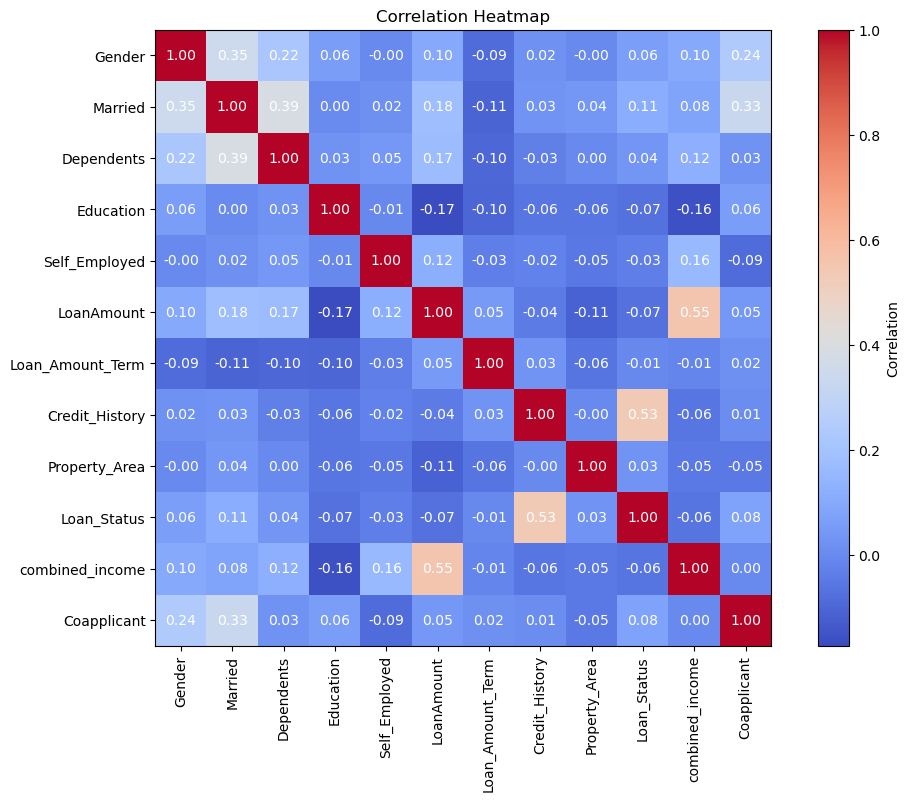

In [96]:
# Compute the correlation matrix
correlation_matrix = loan_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Add numerical values to each square
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.colorbar(heatmap, label='Correlation')
plt.title('Correlation Heatmap')
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.show()

In [97]:
# Create a new column 'income_loan_ratio' to hold the ratio of 'combined_income' over 'LoanAmount'
loan_data['income_loan_ratio'] = loan_data['combined_income'] / loan_data['LoanAmount']

# Check the first few rows to verify
loan_data.head()

Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
1       1        1           1          0              0       128.0   
2       1        1           0          0              1        66.0   
3       1        1           0          1              0       120.0   
4       1        0           0          0              0       141.0   
5       1        1           2          0              1       267.0   

   Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  \
1             360.0             1.0              0            0   
2             360.0             1.0              2            1   
3             360.0             1.0              2            1   
4             360.0             1.0              2            1   
5             360.0             1.0              2            1   

   combined_income  Coapplicant  income_loan_ratio  
1           6091.0         True          47.585938  
2           3000.0        False          45.454545  
3           4941.0         True          41.175000  
4           6000.0        False          42.553191  
5           9613.0         True          36.003745

Split the data into Training and Testing Sets 

In [98]:
# Separate the data into labels and features
# Separate the y variable, the labels using 'Loan Status' as the y variable 
y = loan_data['Loan_Status']

# Separate the X variable, the features
X = loan_data.drop(columns = 'Loan_Status')

In [99]:
# Review the y variable Series
print(y.head())

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32


In [100]:
# Review the X variable DataFrame
print(X.head())

   Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
1       1        1           1          0              0       128.0   
2       1        1           0          0              1        66.0   
3       1        1           0          1              0       120.0   
4       1        0           0          0              0       141.0   
5       1        1           2          0              1       267.0   

   Loan_Amount_Term  Credit_History  Property_Area  combined_income  \
1             360.0             1.0              0           6091.0   
2             360.0             1.0              2           3000.0   
3             360.0             1.0              2           4941.0   
4             360.0             1.0              2           6000.0   
5             360.0             1.0              2           9613.0   

   Coapplicant  income_loan_ratio  
1         True          47.585938  
2        False          45.454545  
3         True          41.17500

In [101]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Fit a logistic regression by using the training data set

In [112]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [114]:
#Fit to classifier
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [113]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver = 'lbfgs', random_state = 1)

# Fit the model using training data
training_model = logistic_regression_model.fit(X_train, y_train)

c:\Users\enc308\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test the model with the test data 

In [116]:
# Make a prediction using the testing data
test_predictions = logistic_regression_model.predict(X_test)
pd.DataFrame({'Predictions': test_predictions, 'Actual': y_test})

Predictions  Actual
378            1       0
365            1       0
47             1       1
487            0       0
552            1       1
..           ...     ...
453            1       1
100            1       1
59             1       1
175            1       1
598            1       1

[120 rows x 2 columns]

In [118]:
#Accuracy score of the train data 
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(X_train, test_predictions)

ValueError: Found input variables with inconsistent numbers of samples: [360, 120]

In [104]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, test_predictions)
print(conf_matrix)

[[ 9 34]
 [ 1 76]]


In [111]:
# Print the classification report for the model
class_report = classification_report(y_test, test_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.21      0.34        43
           1       0.69      0.99      0.81        77

    accuracy                           0.71       120
   macro avg       0.80      0.60      0.58       120
weighted avg       0.77      0.71      0.64       120



Second Test to try to improve accuracy 

In [105]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
#loan_data_scaled = StandardScaler().fit_transform(loan_data)
#loan_data_scaled

In [106]:
# # Create a DataFrame with the scaled data
# df_loan_scaled = pd.DataFrame(loan_data_scaled, columns=['Gender',
#                                                          'Married',
#                                                         'Dependents',
#                                                         'Education',
#                                                         'Self_Employed',  
#                                                         'LoanAmount', 
#                                                         'Loan_Amount_Term',
#                                                         'Credit_History',
#                                                         'Property_Area',
#                                                         'Loan_Status',
#                                                         'combined_income',
#                                                         'Coapplicant',
#                                                         'income_loan_ratio'])


# # Copy the names from the original data
# df_loan_scaled['Loan_ID']=loan_data.index

# # Set the Loan Status column as index
# df_loan_scaled=df_loan_scaled.set_index('Loan_ID')

# # Display sample data
# df_loan_scaled.head(10)

In [107]:
# #Find the best K value
# # Create a list with the number of k-values from 1 to 11
# k=list(range(1,11))

In [108]:
# # Create an empty list to store the inertia values
# inertia=[]

# # Create a for loop to compute the inertia with each possible value of k
# # Inside the loop:
# # 1. Create a KMeans model using the loop counter for the n_clusters
# # 2. Fit the model to the data using `df_loan_scaled`
# # 3. Append the model.inertia_ to the inertia list
# for i in k:
#     k_model = KMeans(n_clusters=i, random_state=0)
#     k_model.fit(df_loan_scaled)
#     inertia.append(k_model.inertia_)

In [109]:
# # Create a dictionary with the data to plot the Elbow curve
# elbow_data = {"k_original": k, "inertia": inertia}

# # Create a DataFrame with the data to plot the Elbow curve
# df_elbow_original = pd.DataFrame(elbow_data)

In [110]:
# # Plot a line chart with all the inertia values computed with 
# # the different values of k to visually identify the optimal value for k.
# elbow_plot = df_elbow_original.hvplot.line(
#     x="k_original", 
#     y="inertia", 
#     title="Elbow Curve", 
#     xticks=k
# )

# elbow_plot